In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

xls = pd.ExcelFile("../../Data/Data_Tables_LGA_Criminal_Incidents_Year_Ending_September_2021.xlsx")
df = pd.read_excel (xls,'Table 02')

In [3]:
df.head(40)

,Year,Year ending,Police Service Area,Local Government Area,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,"PSA Rate per 100,000 population","LGA Rate per 100,000 population"
0,2021,September,Ballarat,Ballarat,A Crimes against the person,A10 Homicide and related offences,A10 Homicide and related offences,4,3.308169,3.528871
1,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,140,115.785923,123.510499
2,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,139,114.958881,122.628281
3,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",42,34.735777,37.053150
4,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,257,212.549873,226.729987
5,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,193,159.619165,170.268045
6,2021,September,Ballarat,Ballarat,A Crimes against the person,A30 Sexual offences,A30 Sexual offences,189,156.310996,166.739173
7,2021,September,Ballarat,Ballarat,A Crimes against the person,A40 Abduction and related offences,A41 Abduction,5,4.135212,4.411089
8,2021,September,Ballarat,Ballarat,A Crimes against the person,A40 Abduction and related offences,A42 False imprisonment,5,4.135212,4.411089
9,2021,September,Ballarat,Ballarat,A Crimes against the person,A50 Robbery,A51 Aggravated robbery,16,13.232677,14.115486


## ANALYSIS OF "OFFENCE  TYPE" OVER 10 YEARS FOR EACH POLICE REGION

In [4]:
cdf = df.groupby(['Offence Division','Year'])['PSA Rate per 100,000 population'].agg(['sum','mean','median',np.var,np.std])
cdf.head(10)

sum       mean     median  \
Offence Division            Year                                       
A Crimes against the person 2012  46321.634919  33.836110  11.188901   
                            2013  49501.796543  34.835888  11.139047   
                            2014  50022.554019  35.177605  11.998800   
                            2015  50388.943176  35.360662  11.917918   
                            2016  55919.857079  38.014859  12.818139   
                            2017  56869.913003  38.978693  13.555523   
                            2018  56921.988859  39.501727  13.858733   
                            2019  58257.679116  39.847934  13.608026   
                            2020  56364.607597  38.872143  13.705568   
                            2021  58875.555186  39.861581  13.994556   

                                          var        std  
Offence Division            Year                          
A Crimes against the person 2012  3408.133019  58.379217  
                            2013  3386.833693  58.196509  
                            2014  3324.478402  57.658290  
                            2015  3283.164970  57.298909  
                            2016  3999.375490  63.240616  
                            2017  3916.206292  62.579600  
                            2018  4158.267486  64.484630  
                            2019  4274.781806  65.381816  
                            2020  3905.481012  62.493848  
                            2021  4140.287391  64.345065

In [5]:
Total = df.groupby(['Year'])['PSA Rate per 100,000 population'].agg('sum')
Total.describe()

count        10.000000
mean     329781.593842
std       15585.636979
min      304824.265059
25%      321008.332884
50%      327678.838420
75%      338157.972814
max      362309.218152
Name: PSA Rate per 100,000 population, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

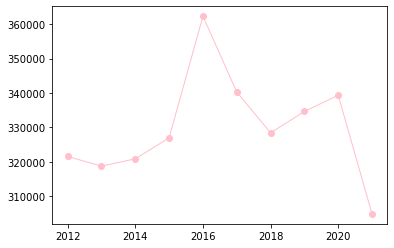

In [6]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="pink", linewidth=1, label="Total")
plt.show

In [7]:
Person = df[df['Offence Division']=='A Crimes against the person']
Person = Person.groupby(['Year'])['PSA Rate per 100,000 population'].sum()
Person

Year
2012    46321.634919
2013    49501.796543
2014    50022.554019
2015    50388.943176
2016    55919.857079
2017    56869.913003
2018    56921.988859
2019    58257.679116
2020    56364.607597
2021    58875.555186
Name: PSA Rate per 100,000 population, dtype: float64

In [8]:
Property = df[df['Offence Division']=='B Property and deception offences']
Property = Property.groupby(['Year'])['PSA Rate per 100,000 population'].sum()
Property

Year
2012    215863.288997
2013    207392.409144
2014    202626.765631
2015    201840.072553
2016    224080.938885
2017    201624.569681
2018    189989.040088
2019    192647.975321
2020    175533.437400
2021    155069.240169
Name: PSA Rate per 100,000 population, dtype: float64

In [9]:
Drugs = df[df['Offence Division']=='C Drug offences']
Drugs = Drugs.groupby(['Year'])['PSA Rate per 100,000 population'].sum()
Drugs

Year
2012    12226.492707
2013    12987.703765
2014    13902.293342
2015    14915.472985
2016    14411.178544
2017    13997.699718
2018    14097.323623
2019    14593.066830
2020    16416.316115
2021    13352.908252
Name: PSA Rate per 100,000 population, dtype: float64

In [10]:
Public = df[df['Offence Division']=='D Public order and security offences']
Public = Public.groupby(['Year'])['PSA Rate per 100,000 population'].sum()
Public

Year
2012    29192.208805
2013    29119.324354
2014    27030.428157
2015    25534.427361
2016    23365.192338
2017    23254.318682
2018    21898.629699
2019    20971.993084
2020    16252.829136
2021    16610.389118
Name: PSA Rate per 100,000 population, dtype: float64

In [11]:
Justice = df[df['Offence Division']=='E Justice procedures offences']
Justice = Justice.groupby(['Year'])['PSA Rate per 100,000 population'].sum()
Justice

Year
2012    16652.798187
2013    18715.317022
2014    26339.528908
2015    33334.521013
2016    43664.250314
2017    43764.733932
2018    44777.912651
2019    47363.327245
2020    49495.747121
2021    49678.206160
Name: PSA Rate per 100,000 population, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

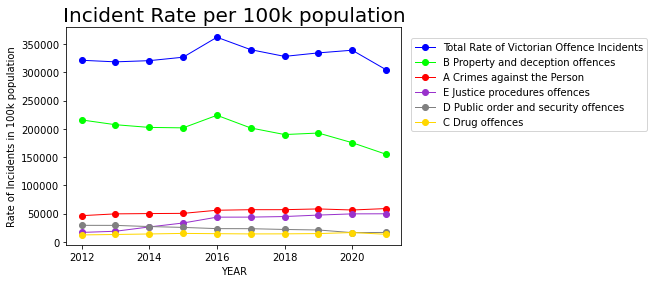

In [22]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="blue", linewidth=1, label="Total Rate of Victorian Offence Incidents")

plt.plot(x,Property, marker="o", color="lime", linewidth=1, label="B Property and deception offences")
plt.plot(x,Person, marker="o", color="red", linewidth=1, label="A Crimes against the Person")
plt.plot(x,Justice, marker="o", color="darkorchid", linewidth=1, label="E Justice procedures offences")
plt.plot(x,Public, marker="o", color="grey", linewidth=1, label="D Public order and security offences")
plt.plot(x,Drugs, marker="o", color="gold", linewidth=1, label="C Drug offences")
plt.legend(loc='lower right', bbox_to_anchor=(1.75, 0.50))
plt.title("Incident Rate per 100k population",fontsize = 20)
plt.xlabel("YEAR")
plt.ylabel("Rate of Incidents in 100k population")
plt.show